In [1]:
#attention: written in the old mix_match_environment 
#need update

import matplotlib
import PIL
import scipy 
from matplotlib import image as img
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# read the image first 
# image is a 3D arrage (M x N x 3) - M and N are the dimensions of the image 

image = img.imread('../00_data/01_test_cherry.jpg')
image.shape

(665, 1000, 3)

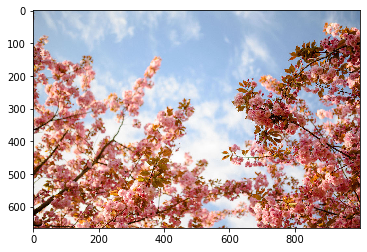

In [3]:
plt.imshow(image)

In [4]:
# covert image into RGB values. 
# each pixel is a list fo 3 numbers, which describes Red, Green and Blue for the specific pixel
# the code decomposes each pixel and store the into respective list (red, green, blue)

r = []
g = []
b = []

for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        

In [5]:
# Plot to see how many clusters are needed 
# Didn't really work out well. The picture still seems to have too many pixels.
# Alternative - use the Elbow method to calculate the best number of clusters
# 
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(r, g, b)
# plt.show()

In [6]:
df = pd.DataFrame({"red" : r, "blue" : b, "green" : g})

In [7]:
df

red  blue  green
0       159   189    177
1       160   190    178
2       161   189    179
3       158   186    176
4       155   183    173
...     ...   ...    ...
664995   71     0      7
664996   81     6     19
664997   82     9     26
664998   73     0     14
664999   94     7     22

[665000 rows x 3 columns]

In [8]:
model = KMeans(n_clusters=3, init="random")
clusters = model.fit(df)

In [9]:
clusters

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [10]:
df["cluster"] = clusters.predict(df)

In [11]:
df["cluster"].value_counts()

1    362606
0    165058
2    137336
Name: cluster, dtype: int64

In [12]:
clusters.cluster_centers_

array([[194.80953594, 119.89191434, 129.02703506],
       [196.77846103, 224.18177026, 205.88486421],
       [131.00009438,  28.39239615,  57.11588721]])

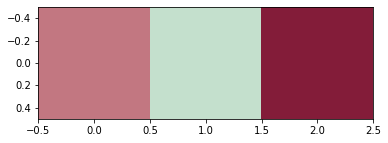

In [13]:
colors = []

for cluster_center in clusters.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
                    scaled_r / 255,
                    scaled_g / 255,
                    scaled_b / 255
                  ))

plt.imshow([colors])
plt.show()

In [16]:
# just a test to sea the variables

for cluster_center in clusters.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    print(scaled_r, scaled_g, scaled_b)

194.80953593559224 119.89191434158805 129.02703505648347
196.77846102890393 224.1817702578889 205.88486420824267
131.00009437664352 28.392396149084107 57.11588721244138


In [17]:
# The example used scipy instead of Sklearn
# Example code also standardized the scale for each column of df

In [18]:
# Try re-do the results inkl. standardization

In [36]:
df_2 = df.drop("cluster", axis=1).copy()

In [37]:
df_2

red  blue  green
0       159   189    177
1       160   190    178
2       161   189    179
3       158   186    176
4       155   183    173
...     ...   ...    ...
664995   71     0      7
664996   81     6     19
664997   82     9     26
664998   73     0     14
664999   94     7     22

[665000 rows x 3 columns]

In [38]:
# the exmample shows the scipy whiten function. However, it didn't work here.
# However, the whiten function suppose to divide each array by its stdv. So I will calculate it manually

In [39]:
r_std, g_std, b_std = df_2[['red', 'green', 'blue']].std() 

In [40]:
df_2 = df_2.assign(r_scaled = df_2["red"] / r_std )
df_2 = df_2.assign(b_scaled = df_2["blue"] / b_std )
df_2 = df_2.assign( g_scaled = df_2["green"] / g_std )

In [41]:
df_2.head()

red  blue  green  r_scaled  b_scaled  g_scaled
0  159   189    177  3.691977  2.290105  2.745933
1  160   190    178  3.715197  2.302222  2.761447
2  161   189    179  3.738417  2.290105  2.776961
3  158   186    176  3.668757  2.253755  2.730419
4  155   183    173  3.599097  2.217404  2.683878

In [42]:
df_2 = df_2.drop(["red", "blue", "green"], axis = 1).copy()

In [43]:
df_2

r_scaled  b_scaled  g_scaled
0       3.691977  2.290105  2.745933
1       3.715197  2.302222  2.761447
2       3.738417  2.290105  2.776961
3       3.668757  2.253755  2.730419
4       3.599097  2.217404  2.683878
...          ...       ...       ...
664995  1.648619  0.000000  0.108596
664996  1.880818  0.072702  0.294761
664997  1.904038  0.109053  0.403357
664998  1.695059  0.000000  0.217192
664999  2.182678  0.084819  0.341302

[665000 rows x 3 columns]

In [44]:
model_2 = KMeans(n_clusters=3, init="random")
clusters_2 = model_2.fit(df_2)
df_2["cluster"] = clusters_2.predict(df_2)

In [45]:
df_2.cluster.value_counts()

1    381677
0    175685
2    107638
Name: cluster, dtype: int64

In [46]:
clusters_2.cluster_centers_

array([[4.3456262 , 1.26056071, 1.80203331],
       [4.6089436 , 2.67416519, 3.16468384],
       [2.76172413, 0.26232734, 0.78191083]])

In [51]:
colors_2 = []

for cluster_center in clusters_2.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors_2.append((
                    (scaled_r * r_std / 255),
                    (scaled_g * g_std / 255),
                    (scaled_b * b_std / 255)
                  ))

print(scaled_b * b_std / 255)

0.2530599254282171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


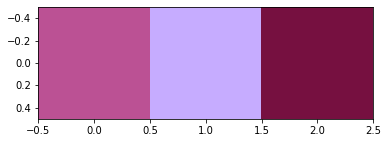

In [48]:
colors_2 = []

for cluster_center in clusters_2.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors_2.append((
                    (scaled_r * r_std / 255),
                    (scaled_g * g_std / 255),
                    (scaled_b * b_std / 255)
                  ))

plt.imshow([colors_2])
plt.show()